### Predicting heart disease using **Machine Learning.**

#### Data:
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

##### Create data dictionary

# Data Dictionary

## Attribute | Description | Type | Range
---|---|---|---
age | age in years | int | 1-95
sex | (1 = male; 0 = female) | int | 0-1
cp | chest pain type | int | 0-3
trestbps | resting blood pressure (in mm Hg on admission to the hospital) | int | 94-204
chol | serum cholestoral in mg/dl | int | 126-564
fbs | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) | int | 0-1
restecg | resting electrocardiographic results | int | 0-2
thalach | maximum heart rate achieved | int | 71-207
exang | exercise induced angina (1 = yes; 0 = no) | int | 0-1
oldpeak | ST depression induced by exercise relative to rest | float | 0.0-6.2
slope | the slope of the peak exercise ST segment | int | 0-2
ca | number of major vessels (0-3) colored by flourosopy | int | 0-3
thal | thalium stress result | int | 1-7
target | have disease or not (1=yes, 0=no) (= the predicted attribute) | int | 0-1


# Data Dictionary

## Attribute | Description | Type | Range | Details
---|---|---|---|---|
age | age in years | int | 1-95 | 
sex | (1 = male; 0 = female) | int | 0-1 | 
cp | chest pain type | int | 0-3 | 
details | details of chest pain type | string | | 0: Typical angina: chest pain related decrease blood supply to the heart<br>1: Atypical angina: chest pain not related to heart<br>2: Non-anginal pain: typically esophageal spasms (non heart related)<br>3: Asymptomatic: chest pain not showing signs of disease
trestbps | resting blood pressure (in mm Hg on admission to the hospital) | int | 94-204 | 
details | details of resting blood pressure | string | | anything above 130-140 is typically cause for concern
chol | serum cholestoral in mg/dl | int | 126-564 | 
details | details of serum cholestoral | string | | serum = LDL + HDL + .2 * triglycerides<br>above 200 is cause for concern
fbs | (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) | int | 0-1 | 
details | details of fasting blood sugar | string | | '>126' mg/dL signals diabetes
restecg | resting electrocardiographic results | int | 0-2 | 
details | details of resting electrocardiographic results | string | | 0: Nothing to note<br>1: ST-T Wave abnormality<br>2: Possible or definite left ventricular hypertrophy
thalach | maximum heart rate achieved | int | 71-207 | 
details | details of maximum heart rate achieved | string | | 
exang | exercise induced angina (1 = yes; 0 = no) | int | 0-1 | 
details | details of exercise induced angina | string | | 
oldpeak | ST depression induced by exercise relative to rest | float | 0.0-6.2 | 
details | details of ST depression induced by exercise relative to rest | string | | looks at stress of heart during excercise unhealthy heart will stress more
slope | the slope of the peak exercise ST segment | int | 0-2 | 
details | details of the slope of the peak exercise ST segment | string | | 0: Upsloping: better heart rate with excercise (uncommon)<br>1: Flatsloping: minimal change (typical healthy heart)<br>2: Downslopins: signs of unhealthy heart
ca | number of major vessels (0-3) colored by flourosopy | int | 0-3 | 
details | details of number of major vessels | string | | colored vessel means the doctor can see the blood passing through<br>the more blood movement the better (no clots)
thal | thalium stress result | int | 1-7 | 
details | details of thalium stress result | string | | 1,3: normal<br>6: fixed defect: used to be defect but ok now<br>7: reversable defect: no proper blood movement when excercising
target | have disease or not (1=yes, 0=no) (= the predicted attribute) | int | 0-1 | 
details | details of have disease or not | string | | 1: has disease<br>0: doesn't have disease


In [1]:
# Import the tools:

# data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay



In [2]:
# load the data
df = pd.read_csv("../data/heart-disease.csv")
# df.head()

In [3]:
df.shape, df.columns, len(df)

((303, 14),
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
       dtype='object'),
 303)

In [4]:
# Let's find out how many of each class there

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: >

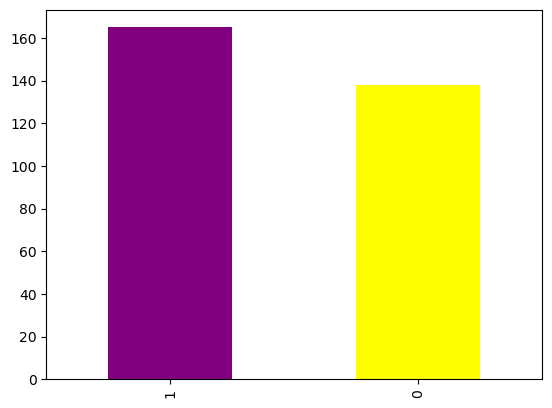

In [17]:
df["target"].value_counts().plot(kind="bar", color=["purple", "yellow"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
# HD freq according to sex
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [26]:
# compare target column & sex column with Pandas
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

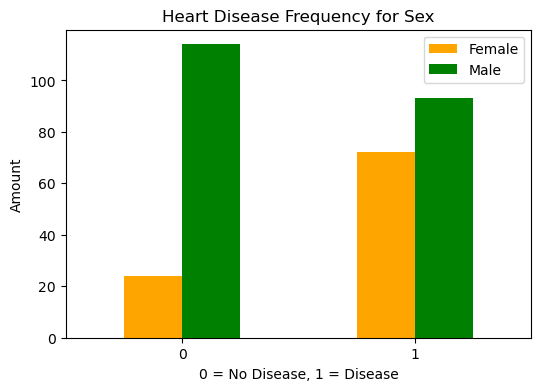

In [30]:
pd.crosstab(df.target, df.sex).plot(
    kind="bar",
    figsize=(6,4),
    color=["orange", "green"],
)

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

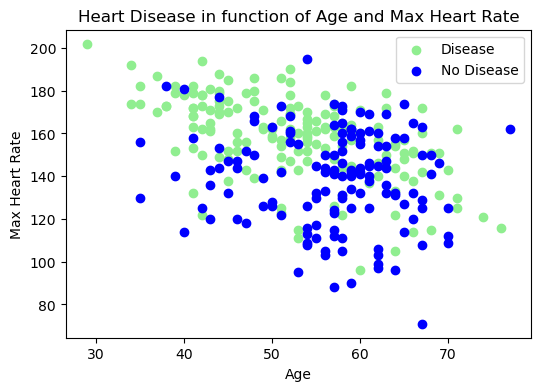

In [39]:
# Age vs. Max Heart Rate for Heart Disease

plt.figure(figsize=(6,4))

# scatter with positive examples:
plt.scatter(
    df.age[df.target == 1],
    df.thalach[df.target == 1],
    c="lightgreen"
)

plt.scatter(
    df.age[df.target == 0],
    df.thalach[df.target == 0],
    c="blue"
)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

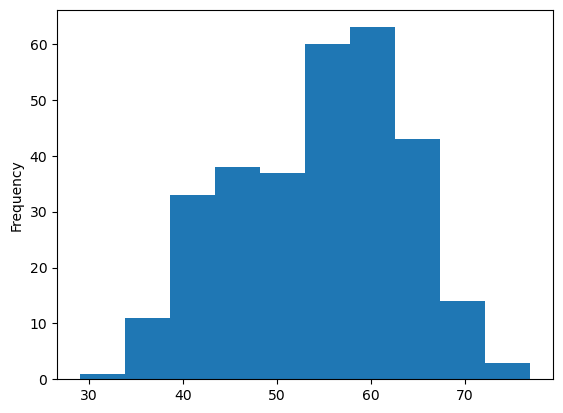

In [40]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

**Heart Disease Frequency per Chest Pain Type**     

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart    

1: Atypical angina: chest pain not related to heart 

2: Non-anginal pain: typically esophageal spasms (non heart related)    

3: Asymptomatic: chest pain not showing signs of disease


In [41]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


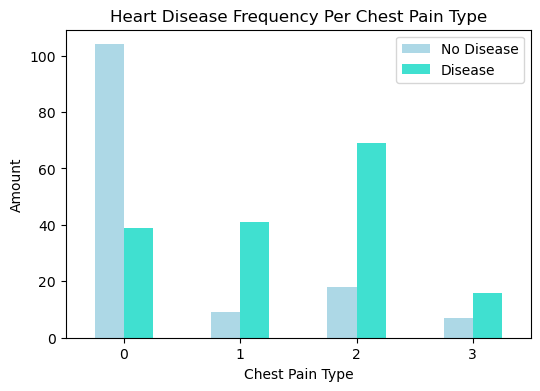

In [43]:
pd.crosstab(df.cp, df.target).plot(
    kind='bar',
    figsize=(6,4),
    color=['lightblue', 'turquoise']
)

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);



In [44]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


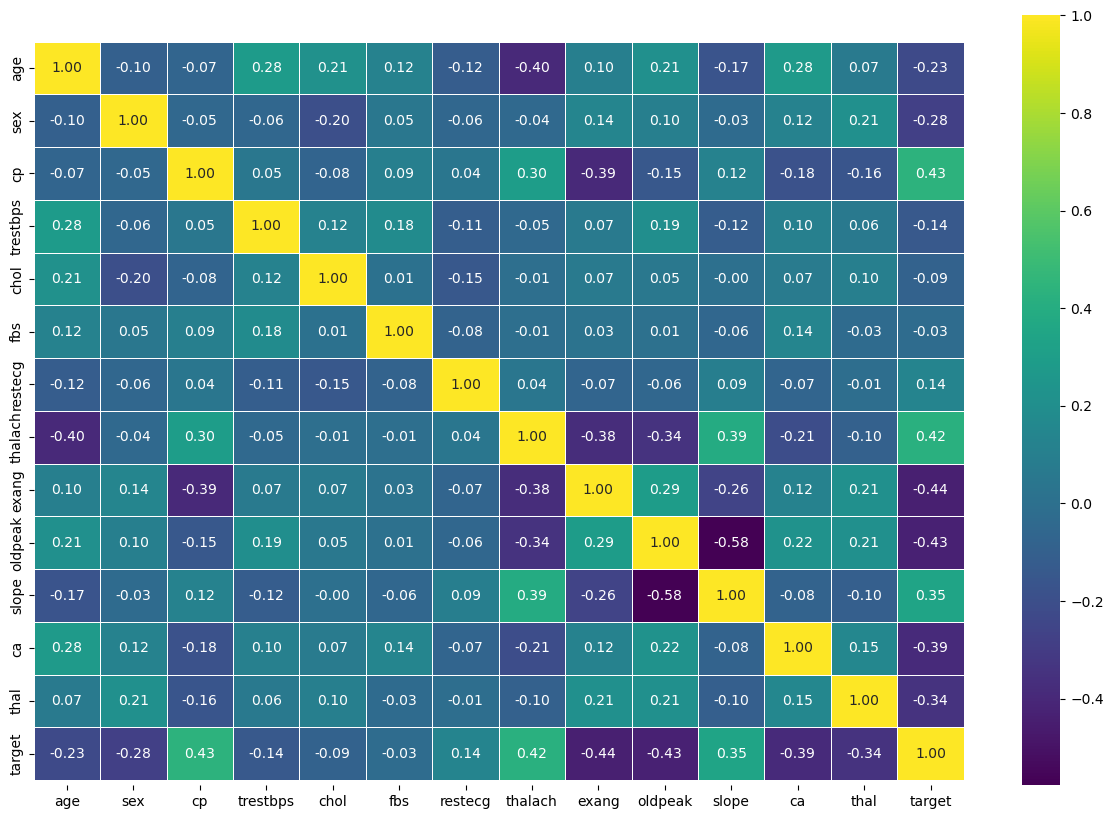

In [14]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10));

ax = sns.heatmap(
    corr_matrix,
    annot= True,
    linewidths=0.5,
    fmt=".2f",
    cmap="viridis"
);

bottom, top = ax.get_ylim();
ax.set_ylim(bottom + 0.1, top - 0.5);

#### ***Modelling***

In [3]:
# split the data:

X = df.drop("target", axis=1)
y = df.target

In [4]:
X.shape, y.shape

((303, 13), (303,))

In [18]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [19]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: target, dtype: int64

In [5]:
# split data into train & test

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

len(X_train), len(X_test), (242+61), len(X)
len(y_train), len(y_test), len(y)


(242, 61, 303)

We're going to try 3 different machine learning models:     

    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier


In [6]:
models = {

    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [7]:
# create a f(x) to fit and score the model:

def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    np.random.seed(42)

    # Make a dict to keep model scores
    model_scores = dict()

    for name, clf in models.items():
        # fit the data:
        clf.fit(X_train, y_train)
        # model score:
        model_scores[name] = clf.score(X_test, y_test)
    return model_scores

In [8]:
model_scores = fit_and_score(

    model=models, 
    X_train=X_train, 
    X_test=X_test, 
    y_train=y_train, 
    y_test=y_test

);

model_scores

/home/fpicado/Documents/Machine-Learning-Workspace/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<AxesSubplot: >

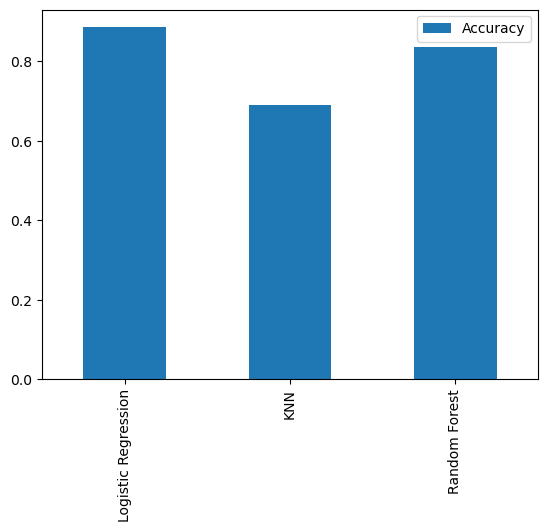

In [11]:
#  visualize the results


model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()

Let's look at the following:    

    -Hypyterparameter tuning
    -Feature importance
    -Confusion matrix
    -Cross-validation
    -Precision
    -Recall
    -F1 score
    -Classification report
    -ROC curve
    -Area under the curve (AUC)


In [9]:
# Let's tune KNN:
train_scores = []
test_scores = []

# create a list of different values for neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different neighbors:
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the algorithm
    knn.fit(X_train, y_train)

    # update the training score list
    train_scores.append(knn.score(X_train, y_train))
    # update the test_score list:
    test_scores.append(knn.score(X_test, y_test))

In [13]:
train_scores[:10]

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579]

In [14]:
test_scores[:10]

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

Maximum KNN score on the test data: 75.41%


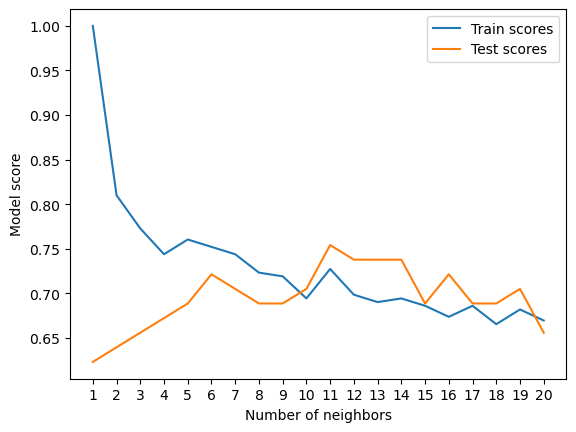

In [10]:
plt.plot(neighbors, train_scores, label="Train scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:    

1. **LogisticRegression()**    
2. **RandomForestClassifier()**  

... using *RandomizedSearchCV*


In [11]:
# create hyperparameter grid for LogisticRegression
log_reg_grid = {

    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

# Hyperparameter grid for RandomForestClassifier
rf_grid = {

    "n_estimators": np.arange(10,1000,50),
    "max_depth": [None, 3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
}

In [12]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [13]:
rs_log_reg.best_params_, rs_log_reg.score(X_test, y_test)

({'solver': 'liblinear', 'C': 0.23357214690901212}, 0.8852459016393442)

In [15]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [16]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [17]:
rs_rf.score(X_test, y_test)

0.8688524590163934


### Hyperparamter Tuning with GridSearchCV

**Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...**


In [18]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=6,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 6 folds for each of 20 candidates, totalling 120 fits


GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [19]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [20]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442


### Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
*Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.


In [25]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [26]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

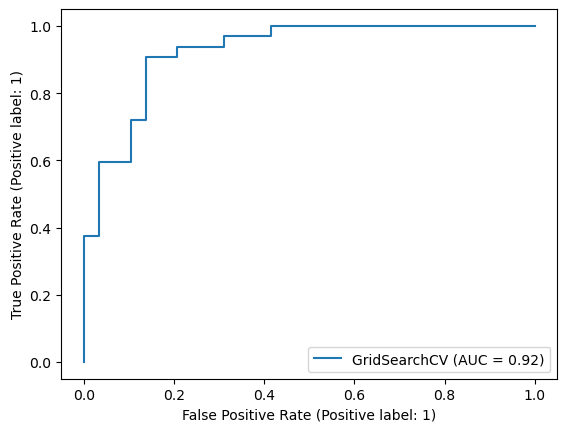

In [36]:
# Plot ROC CURVE and calculate AUC metric

RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test)

In [37]:
# confussion matrix:
confusion_matrix(y_true=y_test, y_pred=y_preds)

array([[25,  4],
       [ 3, 29]])

In [46]:
sns.set(font_scale=1.5)

def plot_confusion_matrix(y_true, y_pred):
    fig, ax = plt.subplots(figsize=(2.2,2.1))
    ax = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_preds),
    annot=True,
    cbar= False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

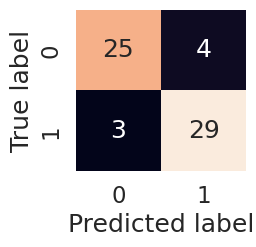

In [47]:
plot_confusion_matrix(y_true=y_test, y_pred=y_preds)

In [50]:
# Classification report
print(classification_report(y_true=y_test, y_pred=y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [52]:
# check best hyperparameters

gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [53]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [54]:
# create function to to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

def calculate_cv_score(clf, X, y, scoring):
    cv_scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
    cv_mean = np.mean(cv_scores)
    return cv_mean

In [59]:
cv_acc = calculate_cv_score(clf, X,y, scoring="accuracy")
cv_prec = calculate_cv_score(clf,X,y,scoring="precision")
cv_rec = calculate_cv_score(clf,X,y,scoring="recall")
cv_f1 = calculate_cv_score(clf,X,y,scoring="f1")

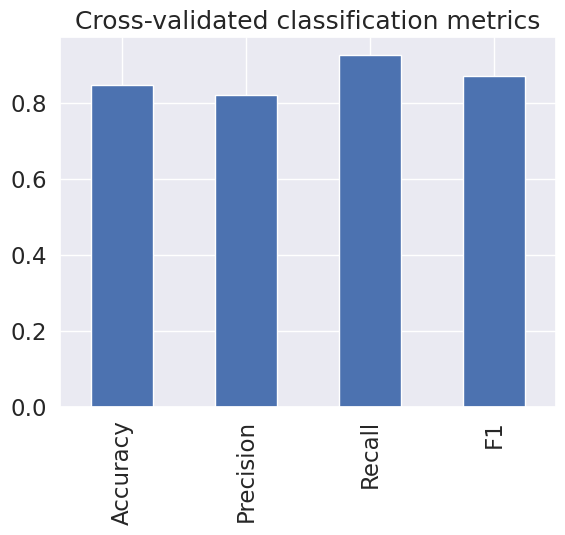

In [61]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_rec,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);
